In [2]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [4]:
# load data
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [44]:
# split to train and test sets
X, y = mnist['data'], mnist['target']
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000].astype('int'), y[60000:].astype('int')

In [45]:
def plot_digit(vector):
    """takes a 784 length vector and produces
        a plot of the digit
    Args:
        vector (itterable): 784 length with floats from 0 to 255
    """
    digit = np.array(vector).reshape((28, 28))
    plt.imshow(digit, cmap='binary')
    plt.axis('off')
    plt.show()

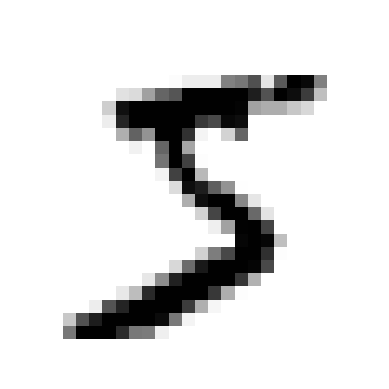

In [46]:
# visualize one digit example
some_digit = X_train.iloc[0]
plot_digit(some_digit)


In [48]:
# simplify classification problem

# two classes: true if 8, false otherwise
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [49]:
# train a classification model
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone

sgd_clf = SGDClassifier() # no parameters? what cost function is default?
sgd_clf.fit(X_train, y_train_8)
y_pred_8 = sgd_clf.predict(X_test)

In [52]:
# understand errors of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix(y_true=y_test_8, y_pred=y_pred_8)


array([[8906,  120],
       [ 541,  433]])

<Figure size 400x400 with 0 Axes>

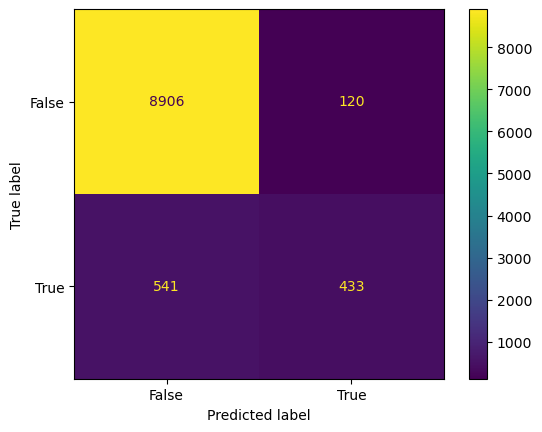

In [55]:
plt.figure(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(y_true=y_test_8, y_pred=y_pred_8)

In [58]:
# calculate error metrics v.s. different threshholds 
from sklearn.metrics import roc_curve

y_score_8 = sgd_clf.decision_function(X_test)

fpr, tpr, threshholds = roc_curve(y_true=y_test_8, y_score=y_score_8)

In [62]:
# visualize error metrics and threshhold
def vis_performance(threshholds, metric1, metric2):
    
    plt.plot(threshholds, metric1)
    plt.plot(threshholds, metric2)

In [59]:
# calculare different scoring metrics
def assess_performance(y_true, y_pred):
    """calculates the different classification 
    metrics for binary classification

    Args:
        y_true (itterable): array of {0, 1} 
        y_pred (itterable): array of predicted {0, 1}
    """
    conf_mtrx = confusion_matrix(y_true, y_pred)
    
    # marginal sums
    n_positive = conf_mtrx[0, :]
    n_negative = conf_mtrx[1, :]
    
    n_pred_positive = conf_mtrx[:, 0]
    n_pred_negative = conf_mtrx[:, 1]
    
    # positives
    tp = conf_mtrx[0, 0]
    fn = conf_mtrx[0, 1]
    
    # negatives
    tn = conf_mtrx[1, 0]
    fp = conf_mtrx[1, 1]
    
    metrics = {}
    
    # recall
    metrics['tp/p'] = tp / n_positive
    # 1 - recall
    metrics['fn/p'] = fn / n_positive
    
    # 1 - percision
    metrics['fp/g'] = fp / n_pred_positive
    # percision
    metrics['tp/g'] = tp / n_pred_positive
    
    # specificity!!
    metrics['tn/n'] = tn / n_negative
    metrics['fn/n'] = fn / n_negative
    
    # !!
    metrics['tn/b'] = tn / n_pred_negative
    metrics['fn/b'] = fn / n_pred_negative
    
    return metrics

In [64]:
metrics = assess_performance(y_test_8, y_pred_8)